<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_NLP_Power/blob/main/DSI_Conference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
! pip install spacy
! pip install textblob
! pip install vaderSentiment
#! python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


# Demonstration for Word to Tokens

In [46]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Camus Stranger
text = "Mother died today. Or maybe, yesterday; I can not be sure."
print("Text:", text, "\n")

doc = nlp(text)

words = [token.text for token in doc]
print("Tokens:", words, "\n")

filtered_words = [token.text for token in doc if not token.is_stop]
print("Tokens without stopwords:", filtered_words, "\n")

words = [token.text for token in doc if token.text.isalpha() and not token.is_stop]
print("Tokens without stopwords, punctuation, and digits:", words, "\n")

lower_lemmatized_words = [token.lemma_.lower() for token in doc if token.text.isalpha() and not token.is_stop]
print("Tokens lower words without stopwords, punctuation, and digits:", lower_lemmatized_words)


Text: Mother died today. Or maybe, yesterday; I can not be sure. 

Tokens: ['Mother', 'died', 'today', '.', 'Or', 'maybe', ',', 'yesterday', ';', 'I', 'can', 'not', 'be', 'sure', '.'] 

Tokens without stopwords: ['Mother', 'died', 'today', '.', 'maybe', ',', 'yesterday', ';', 'sure', '.'] 

Tokens without stopwords, punctuation, and digits: ['Mother', 'died', 'today', 'maybe', 'yesterday', 'sure'] 

Tokens lower words without stopwords, punctuation, and digits: ['mother', 'die', 'today', 'maybe', 'yesterday', 'sure']


In [ ]:
def lemmatize_and_remote_stop_punct(text):
  doc = nlp(text)
  tokens = [token.lemma_.lower() for token in doc if token.text.isalpha() and not token.is_stop]
  return tokens

# Pride and Prejudice. Jane Austen
text = "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."

lemmatize_and_remote_stop_punct(text)

['truth',
 'universally',
 'acknowledge',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'want',
 'wife']

# Word Count and Token count

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Enron_merged_df.csv")
print(df.columns)

df.head()

Index(['Receiver_Name', 'Receiver_Email', 'Receiver_Position', 'Receiver_Rank',
       'Sender_Name', 'Sender_Email', 'Sender_Position', 'Sender_Rank', 'file',
       'message', 'Subject', 'Body', 'Date', 'timezone', 'content', 'Date_UTC',
       'Sender-Receiver', 'direction', 'tokens', 'cleaned_tokens'],
      dtype='object')


,Receiver_Name,Receiver_Email,Receiver_Position,Receiver_Rank,Sender_Name,Sender_Email,Sender_Position,Sender_Rank,file,message,Subject,Body,Date,timezone,content,Date_UTC,Sender-Receiver,direction,tokens,cleaned_tokens
0,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Hunter Shively,hunter.shively@enron.com,Vice President,4,lewis-a/all_documents/6.,Message-ID: <20773283.1075848285687.JavaMail.e...,Western Frontier,---------------------- Forwarded by Hunter S S...,"Mon, 26 Mar 2001 02:44:00 -0800 (PST)",PST,NaN,2001-03-26 10:44:00+00:00,0,same,[],[]
1,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Hunter Shively,hunter.shively@enron.com,Vice President,4,shively-h/_sent_mail/109.,Message-ID: <5246852.1075857472118.JavaMail.ev...,European 10 jet stream heights,---------------------- Forwarded by Hunter S S...,"Wed, 10 Jan 2001 01:09:00 -0800 (PST)",PST,NaN,2001-01-10 09:09:00+00:00,0,same,[],[]
2,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Scott Neal,scott.neal@enron.com,Vice President,4,neal-s/_sent_mail/8.,Message-ID: <15966480.1075841353728.JavaMail.e...,NaN,\n---------------------- Forwarded by Scott Ne...,"Mon, 23 Apr 2001 15:41:00 -0700 (PDT)",PDT,NaN,2001-04-23 22:41:00+00:00,0,same,[],[]
3,Andy Zipper,andy.zipper@enron.com,Vice President,4,Greg Whalley,greg.whalley@enron.com,President,5,whalley-l/_sent_mail/210.,Message-ID: <2502257.1075858067848.JavaMail.ev...,Re:,i cant open this,"Wed, 28 Feb 2001 02:39:00 -0800 (PST)",PST,i cant open this,2001-02-28 10:39:00+00:00,1,downward,"['i', 'cant', 'open', 'thi']","['cant', 'open', 'thi']"
4,Andy Zipper,andy.zipper@enron.com,Vice President,4,Greg Whalley,greg.whalley@enron.com,President,5,whalley-l/_sent_mail/87.,Message-ID: <17433613.1075858013333.JavaMail.e...,RedMeteor.com,---------------------- Forwarded by Greg Whall...,"Fri, 7 Jul 2000 01:58:00 -0700 (PDT)",PDT,NaN,2000-07-07 08:58:00+00:00,1,downward,[],[]


In [ ]:
s_emails = df[["direction", "content"]]
s_emails.fillna("", inplace=True)

<ipython-input-5-5871d54514b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_emails.fillna("", inplace=True)


In [ ]:
# Word Count

def word_count(text):
    return len(text.split())

s_emails["Word_Count"] = s_emails["content"].apply(word_count)

<ipython-input-6-6618171589a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_emails["Word_Count"] = s_emails["content"].apply(word_count)


In [ ]:
# Tokenization

import spacy
import re

nlp = spacy.load("en_core_web_sm")

name_list_receiver = set(df["Receiver_Name"].str.split().explode().str.lower())
name_list_sender = set(df["Sender_Name"].str.split().explode().str.lower())

name_list = list(name_list_receiver | name_list_sender)

default_stop_words = spacy.lang.en.stop_words.STOP_WORDS
custom_stop_words = default_stop_words - {
    "can", "could", "may", "might", "shall", "should", "will", "would", "must", "ought"}

custom_remove_words = {"na", "cc", '`', "+"}

def lemmatize_text_and_remove_punct(text):
    doc = nlp(text)
    date_pattern = re.compile(r'\d{1,2}/\d{1,2}/\d{2,4}')
    time_pattern = re.compile(r'\d{1,2}:\d{2}(:\d{2})?$')

    tokens = [token.lemma_.lower() for token in doc if
                         not token.is_punct
                         and token if not token.like_num
                         and not date_pattern.match(token.text)
                         and not time_pattern.match(token.text)
                         and "@" not in token.text
                         and "$" not in token.text
                         and "=" not in token.text
                         and token.text.lower() not in custom_stop_words
                         and token.text.lower() not in custom_remove_words
                         and token.text.lower() not in name_list
                         and token.ent_type_ != "PERSON"
                         and token.ent_type_ != "DATE"
                         and token.ent_type_ != "TIME"
                         and len(token.lemma_) >= 3
                         ]
    tokens = [token for token in tokens if token.strip()]
    return tokens

s_emails["tokens"] = s_emails["content"].apply(lemmatize_text_and_remove_punct)

s_emails["unique_tokens"] = s_emails["tokens"].apply(set)
s_emails["n_tokens"] = s_emails["tokens"].apply(len)
s_emails["n_unique_tokens"] = s_emails["unique_tokens"].apply(len)

<ipython-input-7-f5bd3b4fedb6>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_emails["tokens"] = s_emails["content"].apply(lemmatize_text_and_remove_punct)
<ipython-input-7-f5bd3b4fedb6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_emails["unique_tokens"] = s_emails["tokens"].apply(set)
<ipython-input-7-f5bd3b4fedb6>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
import pandas as pd
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

s_emails['sentiment'] = s_emails['content'].apply(get_sentiment)

In [43]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming you have a DataFrame called s_emails with a 'content' column

# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to get Vader sentiment
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Apply TextBlob sentiment to the 'content' column
s_emails['textblob_sentiment'] = s_emails['content'].apply(get_textblob_sentiment)

# Apply Vader sentiment to the 'content' column
s_emails['vader_sentiment'] = s_emails['content'].apply(get_vader_sentiment)


ModuleNotFoundError: ignored

In [ ]:
s_emails.groupby("direction")["n_tokens"].mean()

direction
downward     9.054602
same        12.464191
upward      18.001597
Name: n_tokens, dtype: float64

In [ ]:
s_emails.groupby("direction")["Word_Count"].mean()

direction
downward    24.140406
same        31.347480
upward      44.683706
Name: Word_Count, dtype: float64

In [ ]:
s_emails.groupby("direction")["sentiment"].mean()

direction
downward    0.094941
same        0.056201
upward      0.098923
Name: sentiment, dtype: float64

<ipython-input-40-20d21b45fbc0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = s_emails[["direction", "Word_Count", "n_tokens", "n_unique_tokens"]].corr()


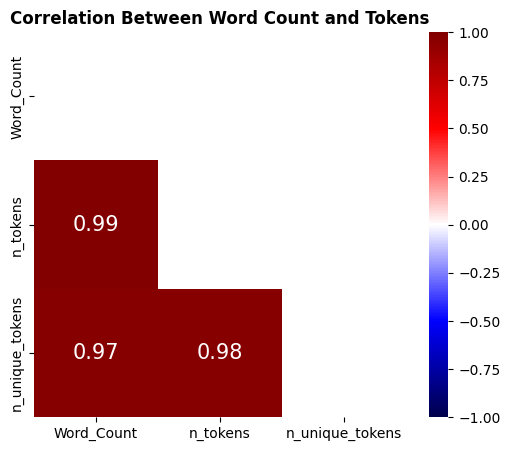

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_corr_matrix = s_emails[["direction", "Word_Count", "n_tokens", "n_unique_tokens"]].corr()

mask = np.triu(np.ones_like(df_corr_matrix))

plt.figure(figsize=(6, 5))

vmin = -1  # Minimum correlation value
vmax = 1   # Maximum correlation value

sns.heatmap(df_corr_matrix,
            mask=mask,
            annot=True, fmt=".2f", cmap="seismic",
            vmin=vmin, vmax=vmax,
             annot_kws={"size":15})

plt.title("Correlation Between Word Count and Tokens",
          #fontsize=28,
          fontweight='bold')

plt.savefig("corr_among_variables.png")

#plt.xlabel("")
#plt.ylabel("")
plt.show()




# Graphs and Statistical Test

                    sum_sq      df         F    PR(>F)
C(direction)  1.377524e+05     2.0  6.068033  0.002358
Residual      2.290564e+07  2018.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same   7.2071 0.4186 -6.2177 20.6318  False
downward upward  20.5433 0.0018   6.502 34.5846   True
    same upward  13.3362  0.054 -0.1752 26.8476  False
------------------------------------------------------


Tukey's HSD P-Values: [0.41859, 0.00177, 0.05397] 



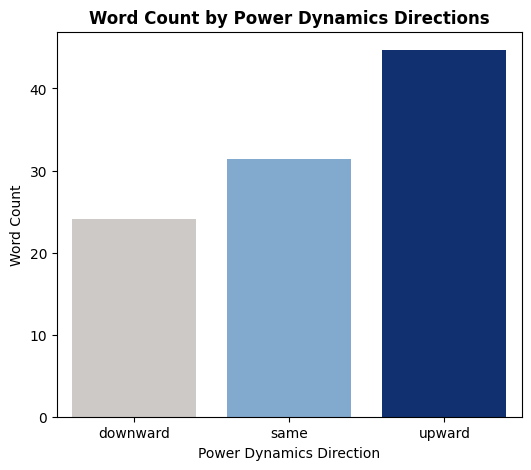

In [41]:

# ANOVA and TukeyHSD result
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('Word_Count ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["Word_Count"], s_emails['direction'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}", "\n")

#########################################################

import matplotlib.pyplot as plt
import seaborn as sns

data = s_emails

# Create your plot with Seaborn
order = ["downward", "same", "upward"]

rgb = [(205, 201, 197), (117, 170, 219), (0, 43, 127)]
colors = [tuple(t / 255 for t in x) for x in rgb]

plt.figure(figsize=(6, 5))

sns.barplot(
    data=data,
    x="direction",
    y="Word_Count",
    order=order,
    palette=colors,
    errorbar=None,
)

plt.title("Word Count by Power Dynamics Directions",  fontweight="bold")
plt.xlabel("Power Dynamics Direction")
plt.ylabel("Word Count")

plt.savefig("word_count_plot.png")

plt.show()

                    sum_sq      df         F    PR(>F)
C(direction)  1.283736e+04     2.0  9.643885  0.000068
Residual      1.343120e+06  2018.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
downward   same   1.6152 0.4741 -1.6356  4.866  False
downward upward   6.1283 0.0001  2.7282 9.5284   True
    same upward   4.5131 0.0035  1.2412 7.7849   True
-----------------------------------------------------


Tukey's HSD P-Values: [0.47409, 7e-05, 0.00354] 



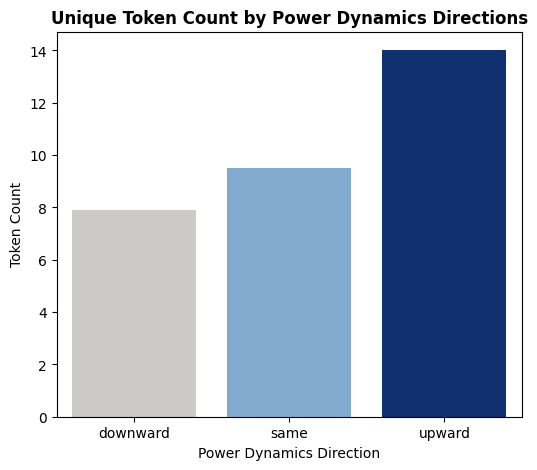

In [42]:
# Tokens
# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('n_unique_tokens ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["n_unique_tokens"], s_emails['direction'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}", "\n")

#############################################################

import matplotlib.pyplot as plt
import seaborn as sns

data = s_emails

# Create your plot with Seaborn
order = ["downward", "same", "upward"]

rgb = [(205, 201, 197), (117, 170, 219), (0, 43, 127)]
colors = [tuple(t / 255 for t in x) for x in rgb]

plt.figure(figsize=(6, 5))

sns.barplot(
    data=data,
    x="direction",
    y="n_unique_tokens",
    order=order,
    palette=colors,
    errorbar=None,
)

plt.title("Unique Token Count by Power Dynamics Directions",  fontweight="bold")
plt.xlabel("Power Dynamics Direction")
plt.ylabel("Token Count")

plt.savefig("token_count_plot.png")

plt.show()

                 sum_sq      df          F    PR(>F)
C(direction)   0.788335     2.0  10.988535  0.000018
Residual      72.387309  2018.0        NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same  -0.0387 0.0004 -0.0626 -0.0149   True
downward upward    0.004 0.9257  -0.021  0.0289  False
    same upward   0.0427 0.0001  0.0187  0.0667   True
------------------------------------------------------


Tukey's HSD P-Values: [0.00042, 0.92571, 9e-05] 



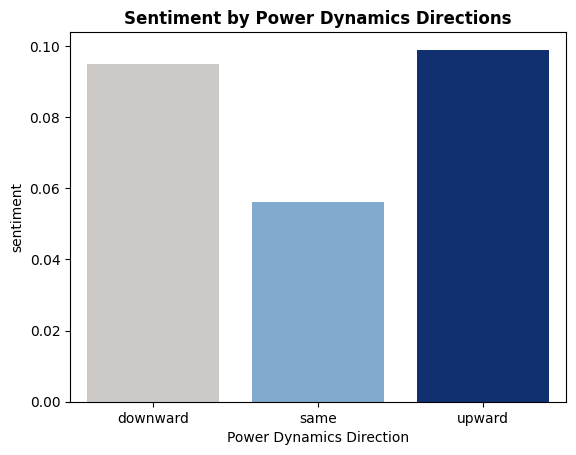

In [20]:

# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('sentiment ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["sentiment"], s_emails['direction'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}", "\n")


#############################################################

import matplotlib.pyplot as plt
import seaborn as sns

data = s_emails

# Create your plot with Seaborn
order = ["downward", "same", "upward"]

rgb = [(205, 201, 197), (117, 170, 219), (0, 43, 127)]
colors = [tuple(t / 255 for t in x) for x in rgb]

sns.barplot(
    data=data,
    x="direction",
    y="sentiment",
    order=order,
    palette=colors,
    errorbar=None,
)

plt.title("Sentiment by Power Dynamics Directions",  fontweight="bold")
plt.xlabel("Power Dynamics Direction")
plt.ylabel("sentiment")

plt.savefig("sentiment_plot.png")

plt.show()